<a href="https://colab.research.google.com/github/Hemanthvedantam/AI-portfolio/blob/main/CricketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(value='kohli', description='Player:', placeholder='Type player name...')

Dropdown(description='Format:', options=('ODI', 'T20'), value='ODI')

--- Kohli's ODI Performance ---
Batting Average: 49.82
Total Runs: 11609
Total Wickets: 4
Bowling Economy Rate: 6.22
Batting Strike Rate: 93.28
Total Catches: 124


<ipython-input-2-9fe2068c275a>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_values, y=stats_labels, palette="coolwarm", ax=axes[0])


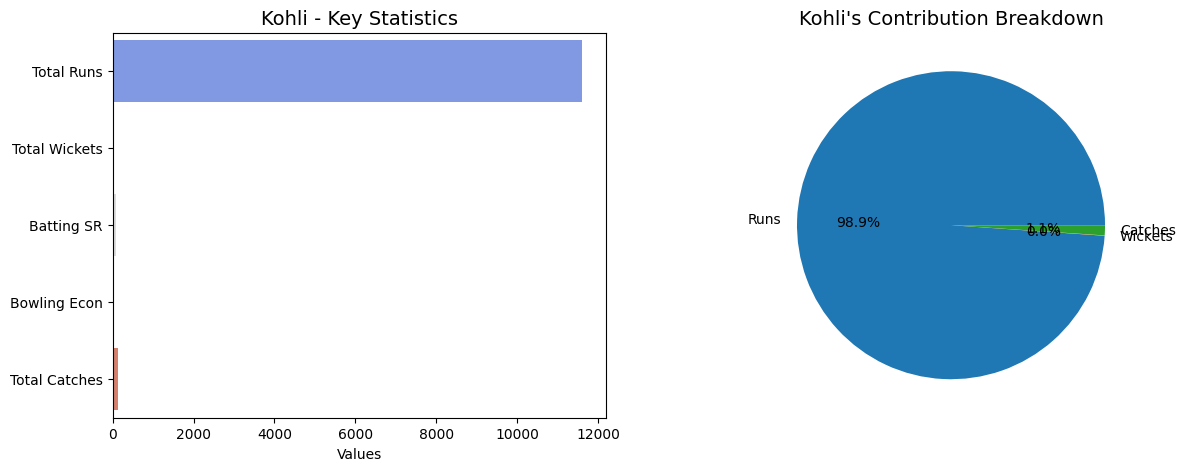

In [2]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

batting_odi = pd.read_csv("ODI data.csv")
bowling_odi = pd.read_csv("Bowling_ODI.csv")
fielding_odi = pd.read_csv("Fielding_ODI.csv")

batting_t20 = pd.read_csv("t20.csv")
bowling_t20 = pd.read_csv("Bowling_t20.csv")
fielding_t20 = pd.read_csv("Fielding_t20.csv")

odi_stats = batting_odi.merge(bowling_odi, on="Player", how="outer") \
                       .merge(fielding_odi, on="Player", how="outer")

t20_stats = batting_t20.merge(bowling_t20, on="Player", how="outer") \
                       .merge(fielding_t20, on="Player", how="outer")

def prepare_stats(df):
    df["Runs_x"] = pd.to_numeric(df["Runs_x"], errors="coerce").fillna(0)
    df["Inns_x"] = pd.to_numeric(df["Inns_x"], errors="coerce").fillna(0)
    df["SR_x"] = pd.to_numeric(df["SR_x"], errors="coerce").fillna(0)
    df["Wkts"] = pd.to_numeric(df["Wkts"], errors="coerce").fillna(0)
    df["Econ"] = pd.to_numeric(df["Econ"], errors="coerce").fillna(0)
    df["Ct"] = pd.to_numeric(df["Ct"], errors="coerce").fillna(0)
    df = df.drop_duplicates(subset="Player")
    return df

odi_stats = prepare_stats(odi_stats)
t20_stats = prepare_stats(t20_stats)

player_input = widgets.Text(description="Player:", placeholder="Type player name...")
format_selector = widgets.Dropdown(options=["ODI", "T20"], description="Format:")

def display_player_analysis(change):
    clear_output(wait=True)
    display(player_input, format_selector)

    player_name = player_input.value.strip().lower()
    selected_format = format_selector.value

    if player_name:
        if selected_format == "ODI":
            player_stats = odi_stats[odi_stats["Player"].str.lower().str.contains(player_name, na=False)]
        elif selected_format == "T20":
            player_stats = t20_stats[t20_stats["Player"].str.lower().str.contains(player_name, na=False)]

        if not player_stats.empty:
            batting_avg = player_stats["Runs_x"].sum() / player_stats["Inns_x"].sum() if player_stats["Inns_x"].sum() > 0 else 0
            total_runs = player_stats["Runs_x"].sum()
            total_wickets = player_stats["Wkts"].sum()
            batting_strike_rate = player_stats["SR_x"].mean()
            economy_rate = player_stats["Econ"].mean()
            total_catches = player_stats["Ct"].sum()

            print(f"--- {player_name.title()}'s {selected_format} Performance ---")
            print(f"Batting Average: {batting_avg:.2f}")
            print(f"Total Runs: {total_runs:.0f}")
            print(f"Total Wickets: {total_wickets:.0f}")
            print(f"Bowling Economy Rate: {economy_rate:.2f}")
            print(f"Batting Strike Rate: {batting_strike_rate:.2f}")
            print(f"Total Catches: {total_catches:.0f}")

            fig, axes = plt.subplots(1, 2, figsize=(14, 5))

            stats_labels = ["Total Runs", "Total Wickets", "Batting SR", "Bowling Econ", "Total Catches"]
            stats_values = [total_runs, total_wickets, batting_strike_rate, economy_rate, total_catches]

            sns.barplot(x=stats_values, y=stats_labels, palette="coolwarm", ax=axes[0])
            axes[0].set_title(f"{player_name.title()} - Key Statistics", fontsize=14)
            axes[0].set_xlabel("Values")

            pie_labels = ["Runs", "Wickets", "Catches"]
            pie_values = [total_runs, total_wickets, total_catches]
            axes[1].pie(pie_values, labels=pie_labels, autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e", "#2ca02c"])
            axes[1].set_title(f"{player_name.title()}'s Contribution Breakdown", fontsize=14)

            plt.show()
        else:
            print(f"No data found for '{player_name}' in {selected_format}. Please check the spelling.")

player_input.on_submit(display_player_analysis)
format_selector.observe(display_player_analysis, names="value")

display(player_input, format_selector)
